[1] --Contour       : found=30; min-req-area=2,484.18 (0.02 at rate); area should be > 2.00%
[c:5] --Contour(box) : selected max-area=19,359.50 at rate=15.59%


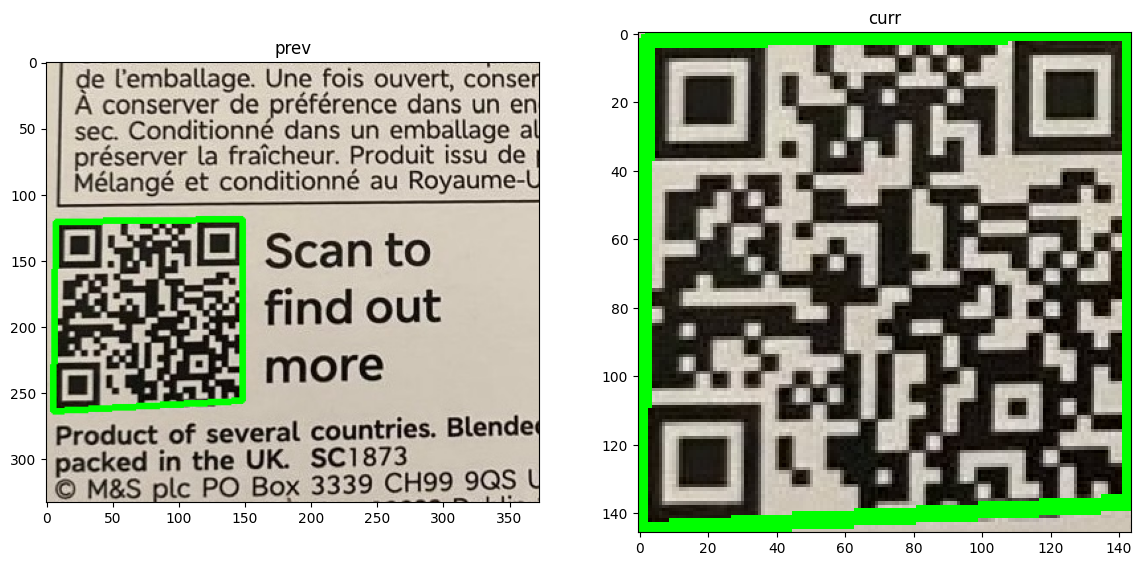

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from ipcv import cvlib, scanner
from importlib import reload
from scipy import stats as st

reload(cvlib)
reload(scanner)


def display_and_swap(prev_img, curr_img):
    # Display the previous and current side-by-side for visual comparison.
    if display:
        plt.figure(figsize=(14, 12))
        plt.subplot(1, 2, 1)
        plt.imshow(prev_img, cmap='gray')
        plt.title('prev')

        plt.subplot(1, 2, 2)
        plt.imshow(curr_img, cmap='gray')
        plt.title('curr')


image = cvlib.load_image('resources/qr-code/qrcode201.jpeg')

gamma = 0.1
gaussian_ksize = (3, 3)
gaussian_sigma = 2
# pre = scanner.preprocess_image(image, gamma, gaussian_ksize, gaussian_sigma)

cropped, contour = scanner.detect_qrcode(image,
                                gamma=gamma,
                                gaussian_ksize=gaussian_ksize,
                                gaussian_sigma=gaussian_sigma,
                                thresh_min=128,
                                box=True,
                                min_area_factor=0.02)
if cropped is not None:
    display_and_swap(image, cropped)
# plt.imshow(cropped, cmap='gray')
